<a href="https://colab.research.google.com/github/JoMihye/Python/blob/main/da04_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 필요한 라이브러리 import

In [ ]:
import matplotlib.pyplot as plt  # 시각화 모듈
import numpy as np  # ndarray(배열)
import pandas as pd  # DataFrame, Series
import seaborn as sns  # 시각화 모듈, 예제 데이터셋

# 데이터 셋 준비

In [ ]:
tips = sns.load_dataset('tips')

In [ ]:
tips.head()  # tips.iloc[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# `matplotlib.pyplot` 모듈을 사용한 시각화

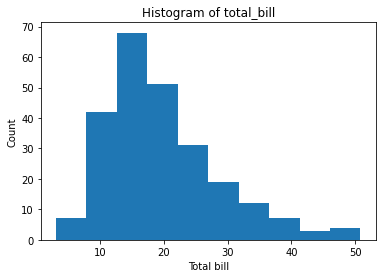

In [ ]:
# 1. figure 객체 생성.
fig = plt.figure()

# 2. figure 객체에 subplot(들)을 추가.
# figure.add_subplot(nrows, ncols, index) : subplot의 행 개수, 열 개수, 위치(인덱스)
# axis = fig.add_subplot(1, 1, 1)

# figure.add_subplot(pos): '행/열/위치' 순서로 만들어진 3자리 정수
axis = fig.add_subplot(111)

# 3. 각각의 subplot에 그래프를 그림.
axis.hist(x=tips['total_bill'])  # total_bill 컬럼의 히스토그램(histogram)

# 4. 그래프 옵션(들)을 설정.
axis.set_title('Histogram of total_bill')
axis.set_xlabel('Total bill')
axis.set_ylabel('Count')

# 5. 그래프 보여주기.
plt.show()

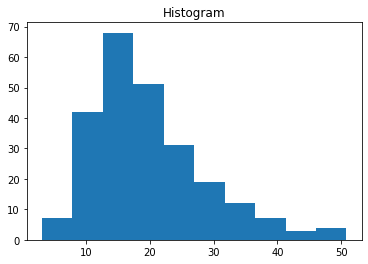

In [ ]:
# 1. figure 객체 생성 + subplot 추가
fig, ax = plt.subplots()  # nrows=1, ncols=1: default argument
# print(fig)
# print(ax)

# 2. subplot에 그래프를 그림
ax.hist(x=tips['total_bill'])

# 3. 옵션 설정
ax.set_title('Histogram')

# 4. 그래프 보여줌.
plt.show()

1개의 figure에 1개의 subplot만 있는 경우에는 `pyplot` 모듈의 top-level 그래프 함수(plot, scatter, hist, boxplot, ...)를 직접 이용할 수도 있음.

top-level 함수를 사용하면 figure 생성과 1개의 subplot 추가를 별도의 코드로 작성할 필요가 없음.

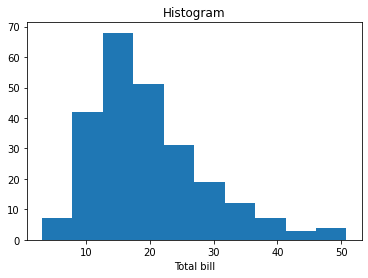

In [ ]:
# figure 생성 + subplot을 추가 + 그래프 추가
plt.hist(x=tips['total_bill'])

# 옵션 설정
plt.title('Histogram')
plt.xlabel('Total bill')

plt.show()

*  1개의 figure에 2개의 subplot들을 위/아래로 배치.
*  위쪽 subplot에는 total_bill 히스토그램을 그림.
*  아래쪽 subplot에는 x축은 total_bill, y축은 tip으로 하는 산점도 그래프.

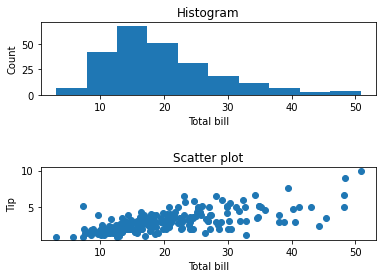

In [ ]:
fig = plt.figure()  # Figure 객체 생성

axis1 = fig.add_subplot(2, 1, 1)  # Figure 객체에 Subplot 객체를 위쪽에 추가
axis2 = fig.add_subplot(212)  # Figure 객체에 Subplot 객체를 아래쪽에 추가

axis1.hist(x=tips.total_bill)  # 위쪽 subplot에 히스토그램을 그림.
axis2.scatter(x=tips['total_bill'], y=tips['tip'])  # 아래쪽 subplot에 산점도 그림.

axis1.set_title('Histogram')  # 옵션
axis1.set_xlabel('Total bill')
axis1.set_ylabel('Count')

axis2.set_title('Scatter plot')
axis2.set_xlabel('Total bill')
axis2.set_ylabel('Tip')

plt.subplots_adjust(hspace=1.0)  # subplot들 간의 horizontal space
plt.show()

*  1개의 figure에 2개의 subplot들을 좌/우로 배치.
*  왼쪽 subplot에는 total_bill 히스토그램을 그림.
*  오른쪽 subplot에는 x축은 total_bill, y축은 tip으로 하는 산점도 그래프.

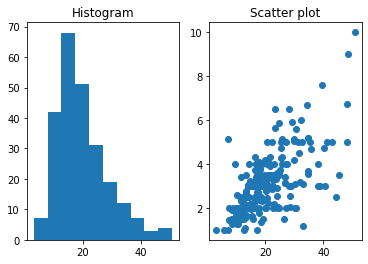

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)  # Figure 생성 + Subplot 추가
# fig: Figure 객체
# axes: Subplot 객체들의 배열(ndarray)
# print(axes)

axes[0].hist(x=tips.total_bill)  # 왼쪽 Subplot에 히스토그램을 그림.
axes[1].scatter(x=tips.total_bill, y=tips.tip)  # 오른쪽 Subplot에 산점도를 그림.

axes[0].set_title('Histogram')
axes[1].set_title('Scatter plot')

plt.show()

# Box Plot

숫자 타입 변수(컬럼)의 기술 통계량(최솟값, 25%, 50%, 75%, 최댓값) 시각화.

데이터들이 어느 정도 분산되어 있는지, 이상치(outlier)들이 있는지 등을 확인.

In [ ]:
tips['total_bill'].describe()

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

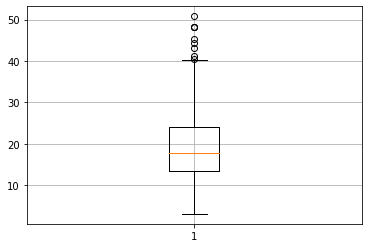

In [ ]:
plt.boxplot(x=tips.total_bill)
plt.grid()
plt.show()

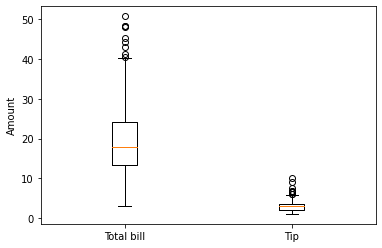

In [ ]:
# 1개의 figure와 subplot 안에 total_bill의 boxplot, tip의 boxplot을 시각화.
plt.boxplot(x=[tips.total_bill, tips.tip], labels=['Total bill', 'Tip'])
plt.ylabel('Amount')
plt.show()

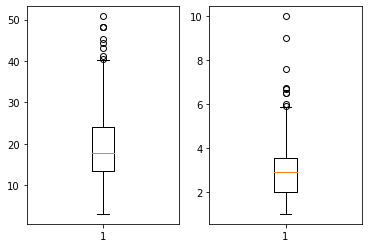

In [ ]:
fig, ax = plt.subplots(ncols=2)
ax[0].boxplot(x=tips.total_bill)
ax[1].boxplot(x=tips.tip)
plt.show()

*  성별 tip의 box plot

In [ ]:
# warnings를 콘솔창에 나타나지 않도록 하는 코드
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

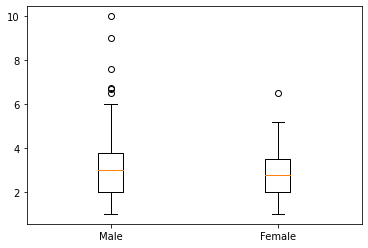

In [ ]:
Male = tips[tips.sex == 'Male']
Female = tips[tips.sex == 'Female']
tips_by_sex = np.array([Male.tip, Female.tip], dtype='object')

plt.boxplot(x=tips_by_sex, labels=['Male', 'Female'])

plt.show()

*  시간별 tip의 box plot

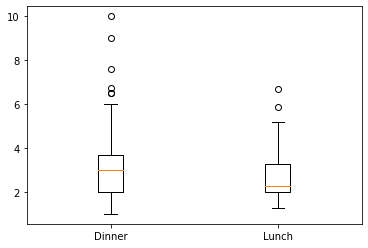

In [ ]:
tips.time.value_counts()

Dinner = tips[tips.time == 'Dinner']
Lunch = tips[tips.time == 'Lunch']

plt.boxplot(x=[Dinner.tip, Lunch.tip], labels=['Dinner', 'Lunch'])
plt.show()

*  요일별 tip의 box plot

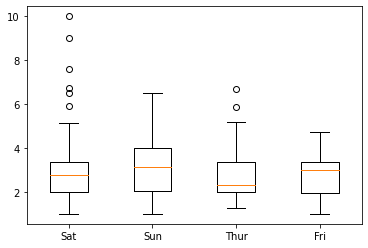

In [ ]:
tips.day.value_counts()

Sat = tips[tips.day == 'Sat']
Sun = tips[tips.day == 'Sun']
Thur = tips[tips.day == 'Thur']
Fri = tips[tips.day == 'Fri']

plt.boxplot(x=[Sat.tip, Sun.tip, Thur.tip, Fri.tip], labels=['Sat', 'Sun', 'Thur', 'Fri'])
plt.show()

In [ ]:
days = tips.day.unique()
days

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
tips_by_day = []  # 요일별 부분집합(DataFrame)의 tip 컬럼을 저장하기 위한 빈 리스트
for d in days:
    tips_by_day.append(tips[tips.day == d].tip)

# list comprehension
# tips_by_day = [tips[tips.day == x].tip for x in days]

tips_by_day = np.array(tips_by_day, dtype='object')  # 리스트를 ndarray로 변환

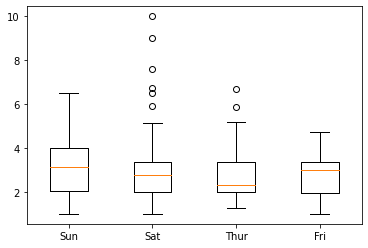

In [ ]:
plt.boxplot(x=tips_by_day, labels=days)
plt.show()

# Histogram

연속형 자료를 구간으로 나눠서 구간 안에 포함된 자료의 개수를 막대로 표현한 그래프.

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


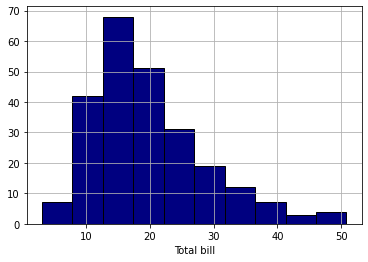

In [ ]:
plt.hist(x=tips.total_bill,  # 히스토그램을 그리기 위한 연속형 자료
         bins=10,            # 막대의 개수 또는 나누는 구간
         edgecolor='black',  # 막대의 테두리 색깔
         color='navy')       # 막대 내부 색깔

plt.grid()  # 격자 보조선
plt.xlabel('Total bill')
plt.show()

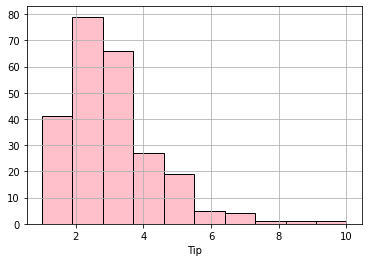

In [ ]:
# tip의 히스토그램
plt.hist(x=tips.tip, edgecolor='black', color='pink')
plt.xlabel('Tip')
plt.grid()
plt.show()

In [ ]:
# 카테고리 타입 변수를 카테고리 순서로 출력:
# data_frame.column.cat.categories
# data_frame['column'].cat.categories
# cat: 카테고리 접근자(Category Accessor)
tips.day.cat.categories

Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object')

# 막대 그래프

카테고리 타입 자료의 빈도수를 막대로 표현한 그래프.

In [ ]:
# 성별 빈도수
gender_counts = tips.sex.value_counts()
gender_counts

Male      157
Female     87
Name: sex, dtype: int64

In [ ]:
gender_counts.index

CategoricalIndex(['Male', 'Female'], categories=['Male', 'Female'], ordered=False, dtype='category')

In [ ]:
gender_counts.values

array([157,  87])

## 세로 막대 그래프(Vertical bar plot)

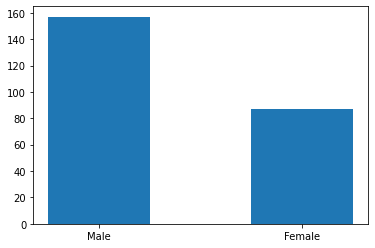

In [ ]:
plt.bar(x=gender_counts.index, height=gender_counts.values, width=0.5)
plt.show()

## 가로 막대 그래프(horizontal bar plot)

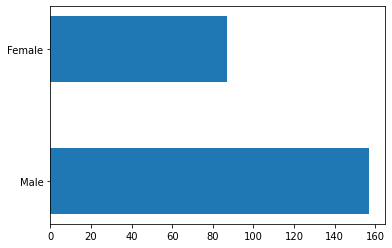

In [ ]:
plt.barh(y=gender_counts.index, width=gender_counts.values, height=0.5)
plt.show()

* size의 빈도수를 세로/가로 막대 그래프

In [ ]:
size_count = tips['size'].value_counts()  # 빈도수(개수)의 내림차순 정렬
size_count

2    156
3     38
4     37
5      5
1      4
6      4
Name: size, dtype: int64

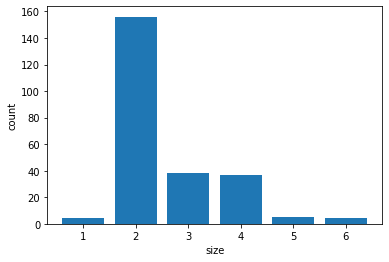

In [ ]:
plt.bar(x=size_count.index, height=size_count.values)
plt.xlabel('size')
plt.ylabel('count')
plt.show()

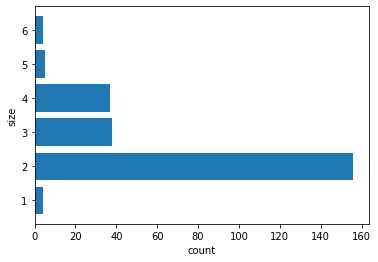

In [ ]:
plt.barh(y=size_count.index, width=size_count.values)
plt.ylabel('size')
plt.xlabel('count')
plt.show()

* 4개의 Subplot(row 2개, column 2개)를 Figure에 추가
* 각각의 Subplot에 성별 빈도수, 흡연여부 빈도수, 요일 빈도수, 시간 빈도수 세로 막대 그래프를 시각화.

In [ ]:
gender_counts = tips['sex'].value_counts()
smoker_counts = tips['smoker'].value_counts()
day_counts = tips['day'].value_counts()
time_counts = tips['time'].value_counts()

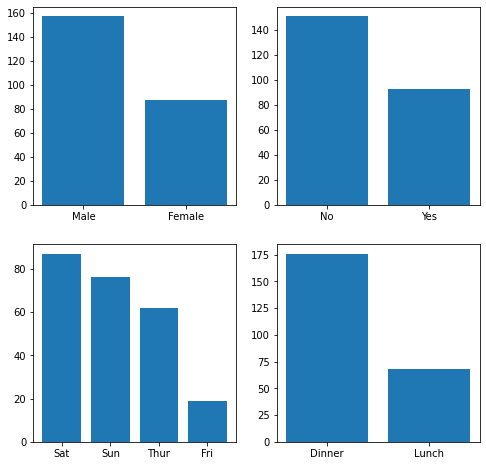

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
ax[0, 0].bar(x=gender_counts.index, height=gender_counts.values)
ax[0, 1].bar(x=smoker_counts.index, height=smoker_counts.values)
ax[1, 0].bar(x=day_counts.index, height=day_counts)
ax[1, 1].bar(x=time_counts.index, height=time_counts.values)

plt.show()

# 산점도(Scatter plot)

두 변수(컬럼)의 상관 관계를 파악할 때 사용.

`y ~ x` 관계 표현: y는 관심 변수, x는 독립 변수.

In [ ]:
tips.head()  # tips.iloc[:5]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


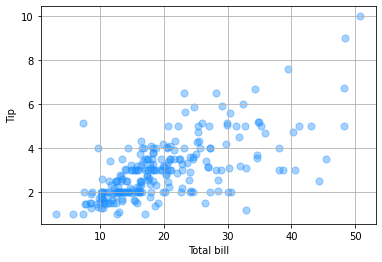

In [ ]:
plt.scatter(x=tips.total_bill, y=tips.tip,  # x축, y축에 사용할 자료
            alpha=0.4,  # 투명도: 0 ~ 1까지 값을 사용. 0에 가까울 수록 투명. 1에 가까울 수록 불투명.
            s=50,  # 마커(점)의 크기(size)
            c='dodgerblue',  # 마커의 색깔(color)
            marker='o')  # 마커 모양(o, s, ^, v, *, +, ...)

plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.grid()
plt.show()

*   tip ~ total_bill의 산점도
*   남성인 경우에는 마커 색깔을 blue, 여성인 경우에는 마커 색깔을 red

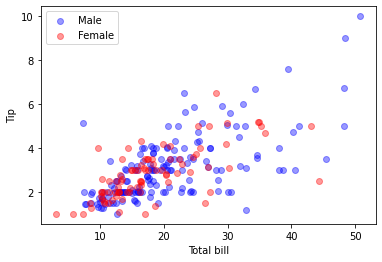

In [ ]:
male = tips[tips.sex == 'Male']
female = tips[tips.sex == 'Female']

plt.scatter(x=male.total_bill, y=male.tip, c='blue', alpha=0.4, label='Male')
plt.scatter(x=female.total_bill, y=female.tip, c='red', alpha=0.4, label='Female')

plt.legend()  # 범례: 각각의 scatter 함수의 label argument를 표시.
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

*   tip ~ total의 산점도
*   성별에 따라 마커의 색깔을 다르게 표현.
*   흡연 여부에 따라 마커의 모양을 다르게 표현.

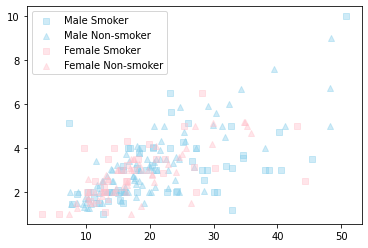

In [ ]:
male_smoker = tips[(tips.sex == 'Male') & (tips.smoker == 'Yes')]
male_nonsmoker = tips[(tips.sex == 'Male') & (tips.smoker == 'No')]
female_smoker = tips[(tips.sex == 'Female') & (tips.smoker == 'Yes')]
female_nonsmoker = tips[(tips.sex == 'Female') & (tips.smoker == 'No')]

plt.scatter(x=male_smoker.total_bill, y=male_smoker.tip, 
            c='skyblue', marker='s', alpha=0.4, label='Male Smoker')
plt.scatter(x=male_nonsmoker.total_bill, y=male_nonsmoker.tip, 
            c='skyblue', marker='^', alpha=0.4, label='Male Non-smoker')
plt.scatter(x=female_smoker.total_bill, y=female_smoker.tip, 
            c='pink', marker='s', alpha=0.4, label='Female Smoker')
plt.scatter(x=female_nonsmoker.total_bill, y=female_nonsmoker.tip, 
            c='pink', marker='^', alpha=0.4, label='Female Non-smoker')

plt.legend()
plt.show()

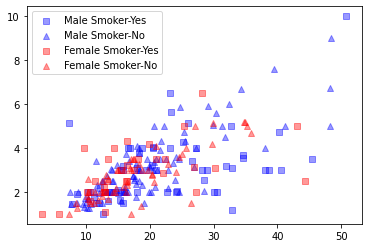

In [ ]:
gender = tips.sex.cat.categories
smoker = tips.smoker.cat.categories

colors = ['blue', 'red']  # 성별에 따른 마커 색깔 구분을 위해서 (남성-blue, 여성-red)
markers = ['s', '^']  # 흡연 여부에 따른 마커 모양을 구분하기 위해서 (Yes-s, No-^)

for g, c in zip(gender, colors):
    for s, m in zip(smoker, markers):
        subset_df = tips[(tips.sex == g) & (tips.smoker == s)]
        plt.scatter(x=subset_df.total_bill, y=subset_df.tip,
                    c=c, marker=m, alpha=0.4, label=f'{g} Smoker-{s}')
        
plt.legend()
plt.show()

# 선 그래프(Line Plot)

시계열 그래프(주식 가격, 환율, 미세먼지 농도, 코로나 확진자 수, ...)를 표현.

In [ ]:
# 선 그래프를 위한 가상의 데이터 프레임 작성.
np.random.seed(1)  # 난수가 생성되는 순서를 유지시키기 위해서.
df = pd.DataFrame({'x1': np.arange(10),
                   'x2': np.random.rand(10)})
df

,x1,x2
0,0,0.417022
1,1,0.720324
2,2,0.000114
3,3,0.302333
4,4,0.146756
5,5,0.092339
6,6,0.186260
7,7,0.345561
8,8,0.396767
9,9,0.538817


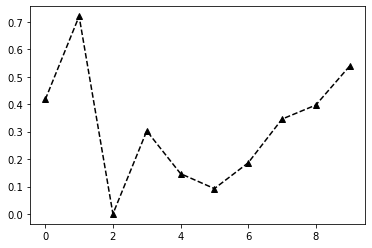

In [ ]:
plt.plot(df.x1, df.x2, 'k^--')
# plot 함수의 3번째 argument - format string: 'color-marker-line style'
# color: b(lue), r(ed), g(reen), (blac)k, ...
# marker: o, s, ^, v, ...
# line style: -(solid line), --(dashed line), :(dotted line), ...

plt.show()

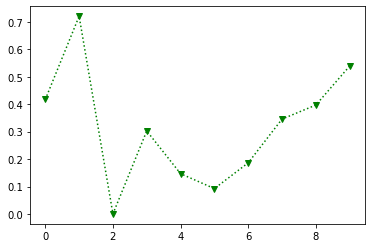

In [ ]:
plt.plot(df.x1, df.x2, c='green', marker='v', linestyle='dotted')
plt.show()

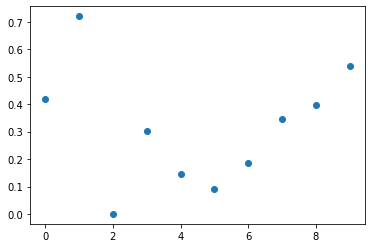

In [ ]:
# plot 함수에서 linestyle을 없애버리면 산점도가 됨.
plt.plot(df.x1, df.x2, 'o')
plt.show()

In [ ]:
np.random.seed(1)
df = pd.DataFrame({'y1': np.random.rand(10),
                   'y2': np.random.rand(10),
                   'y3': np.random.rand(10)})
df

,y1,y2,y3
0,0.417022,0.419195,0.800745
1,0.720324,0.685220,0.968262
2,0.000114,0.204452,0.313424
3,0.302333,0.878117,0.692323
4,0.146756,0.027388,0.876389
5,0.092339,0.670468,0.894607
6,0.186260,0.417305,0.085044
7,0.345561,0.558690,0.039055
8,0.396767,0.140387,0.169830
9,0.538817,0.198101,0.878143


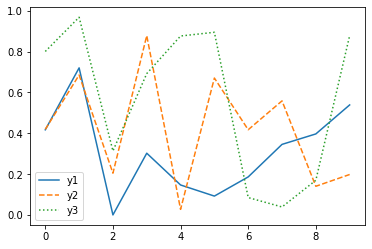

In [ ]:
plt.plot(df.y1, label='y1', linestyle='-')  # solid
plt.plot(df['y2'], label='y2', linestyle='--')  # dashed
plt.plot(df['y3'], label='y3', linestyle=':')  # dotted

plt.legend()
plt.show()

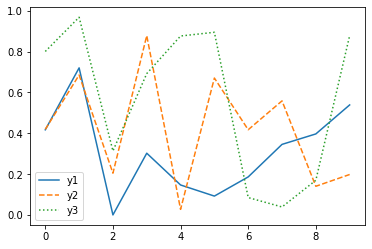

In [ ]:
linestyles = ['solid', 'dashed', 'dotted']
for y, ls in zip(df.columns, linestyles):
    plt.plot(df[y], label=y, linestyle=ls)

plt.legend()
plt.show()